## Tree 알고리즘

In [38]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
red_wine['class'] = 0
# red_wine.head()

In [40]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
white_wine['class'] = 1

In [41]:
wine = pd.concat([red_wine, white_wine])

In [42]:
#wine.info()

In [43]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]   # target = 정답을 의미

In [44]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7828407224958949
0.7790769230769231


C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8511904761904762
0.8449230769230769


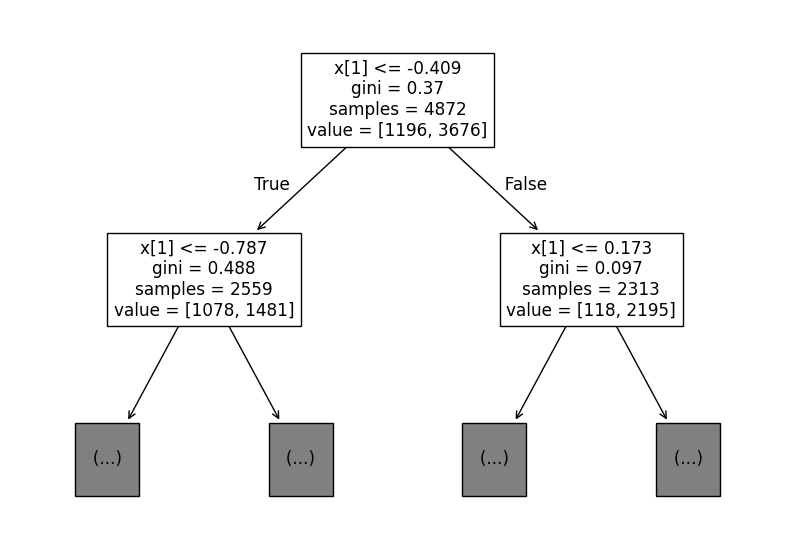

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1)
plt.show()